In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

## Connecting Amenities and Price in the US
After attempting to create a connection between amenities and price on a global scale with a result of 0.4 as an R value, we decided to try to see if there would be a stronger connection between US Airbnb's on a city scale. 

In [2]:
df = pd.read_pickle("../../Datasets/Data_viz_project/airbnb_usa_cities.pkl")

In [3]:
df.head()

,Listing ID,Name,Host ID,Host Name,Host Response Rate,Host Is Superhost,Host total listings count,Street,City,Neighbourhood cleansed,...,Last Review Date,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Reviews per month,Amenity_Count
0,12205354,Artsy apartment near Moscone Center,65392037,Alex,100.0,False,1.0,___| CA| United States,San Francisco,South of Market,...,2017-09-25,92.0,9.0,9.0,10.0,10.0,9.0,9.0,5.22,23
1,3230382,Large master bedroom & covered patio; __________,15878447,Betty,100.0,True,9.0,___| CA 91755| United States,Los Angeles,Monterey Park,...,2016-12-28,95.0,10.0,9.0,9.0,10.0,10.0,9.0,1.11,14
2,10491563,___downtown____soma__loft_____,48920457,Margarita,100.0,False,1.0,___| CA| United States,San Francisco,Financial District,...,2016-06-15,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0.24,4
3,17545953,___________;___;__3______;_____,74732009,_,100.0,False,5.0,____| CA 91748| United States,Los Angeles,Rowland Heights,...,2017-03-23,90.0,10.0,9.0,10.0,8.0,9.0,10.0,1.18,22
4,3878470,Spacious and comfortable room,17618378,Chingching,100.0,False,21.0,Armstrong St| ____| CA 92111| United States,San Diego,Clairemont Mesa,...,2016-06-13,95.0,10.0,10.0,10.0,10.0,9.0,9.0,0.57,15


In [4]:
df.columns

Index(['Listing ID', 'Name', 'Host ID', 'Host Name', 'Host Response Rate',
       'Host Is Superhost', 'Host total listings count', 'Street', 'City',
       'Neighbourhood cleansed', 'State', 'Country', 'latitude', 'longitude',
       'Property type', 'Room type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Amenities', 'Price', 'Minimum nights', 'Maximum nights',
       'Availability 365', 'Calendar last scraped', 'Number of reviews',
       'Last Review Date', 'Review Scores Rating', 'Review Scores Accuracy',
       'Review Scores Cleanliness', 'Review Scores Checkin',
       'Review Scores Communication', 'Review Scores Location',
       'Review Scores Value', 'Reviews per month', 'Amenity_Count'],
      dtype='object')

## Creating a normalized price table
- using describe/mode to see if there are large varitions in the normalized data


In [5]:
df = df.assign(city_average=df.groupby("City").transform("mean")["Price"])

In [6]:
df = df.assign(Normalized=df["Price"]/df["city_average"])

In [7]:
df["Normalized"].describe()

count    105280.000000
mean          1.000000
std           0.779847
min           0.029885
25%           0.521553
50%           0.775514
75%           1.197342
max          10.253869
Name: Normalized, dtype: float64

In [8]:
df["Normalized"].mode()

0    0.896554
dtype: float64

In [9]:
df["Normalized"].median()

0.7755141133170058

### Limiting our data to only listings with 30 or less amenities, just like in our other datasets

In [10]:
df_30 = df.loc[df["Amenity_Count"]<= 30]

### Exploring Manhattan to see if  `Neighbourhood cleansed` would be reliable to group by 

In [11]:
df_30.loc[df_30["City"]== "Manhattan"]["Neighbourhood cleansed"].value_counts()

Harlem                 1952
East Village           1502
Upper West Side        1366
Hell's Kitchen         1275
Upper East Side        1250
East Harlem             840
Chelsea                 780
Midtown                 752
Lower East Side         718
Washington Heights      637
West Village            608
Chinatown               306
Greenwich Village       297
Kips Bay                296
Financial District      257
SoHo                    255
Morningside Heights     249
Nolita                  247
Gramercy                227
Murray Hill             185
Inwood                  164
Theater District        124
Tribeca                  92
Little Italy             80
Flatiron District        63
NoHo                     59
Roosevelt Island         55
Two Bridges              47
Civic Center             29
Battery Park City        28
Stuyvesant Town          19
Unionport                 1
Marble Hill               1
Name: Neighbourhood cleansed, dtype: int64

### Plot of price vs. Manhattan neighborhood

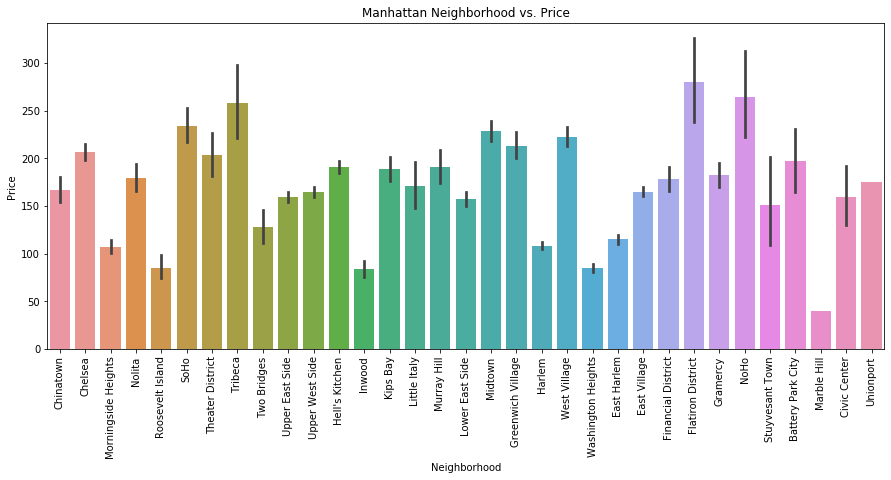

In [12]:
fig, ax = plt.subplots(figsize=(15,6)) 
ax = sns.barplot(data=(df_30.loc[df_30["City"]== "Manhattan"]),
                    x="Neighbourhood cleansed",
                    y="Price");
plt.xticks(rotation=90);
ax.set_title("Manhattan Neighborhood vs. Price");
ax.set(xlabel="Neighborhood", ylabel="Price");

### Amenity vs. Manhattan neighborhood

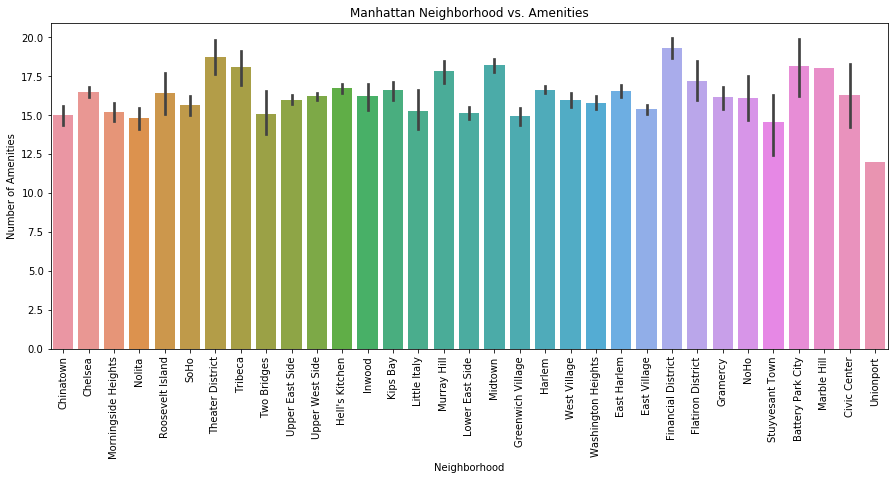

In [13]:
fig, ax = plt.subplots(figsize=(15,6)) 
ax = sns.barplot(data=(df_30.loc[df_30["City"]== "Manhattan"]),
                    x="Neighbourhood cleansed",
                    y="Amenity_Count");
plt.xticks(rotation=90);
ax.set_title("Manhattan Neighborhood vs. Amenities");
ax.set(xlabel="Neighborhood", ylabel="Number of Amenities");

### Review score total against Manhattan neighborhood

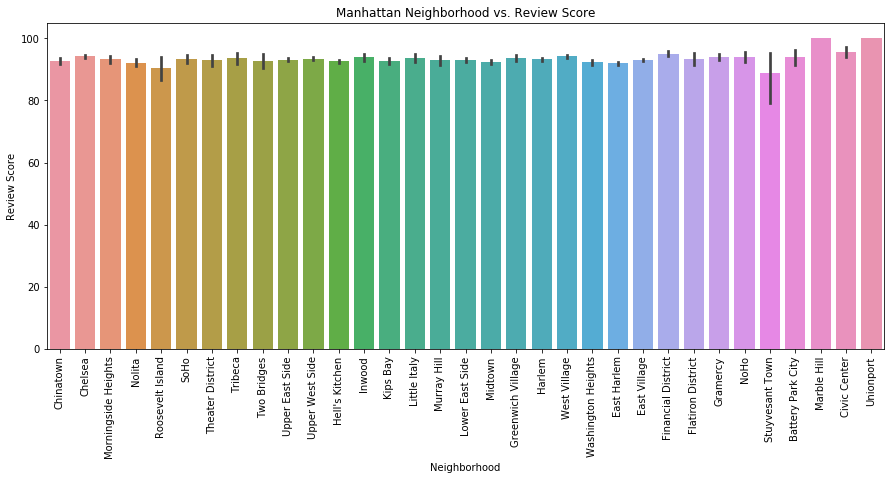

In [14]:
fig, ax = plt.subplots(figsize=(15,6)) 
ax = sns.barplot(data=(df_30.loc[df_30["City"]== "Manhattan"]),
                    x="Neighbourhood cleansed",
                    y="Review Scores Rating");
plt.xticks(rotation=90);
ax.set_title("Manhattan Neighborhood vs. Review Score");
ax.set(xlabel="Neighborhood", ylabel="Review Score");

### Price vs. city

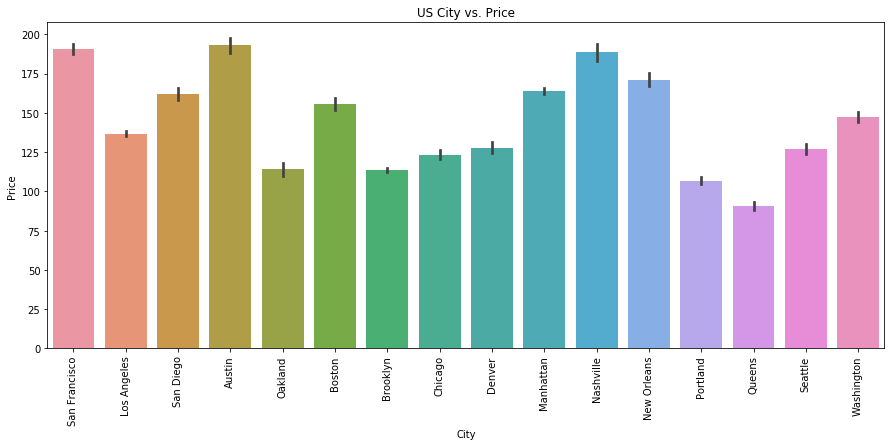

In [15]:
fig, ax = plt.subplots(figsize=(15,6)) 
ax = sns.barplot(data=df_30,
                    x="City",
                    y="Price");
plt.xticks(rotation=90);
ax.set_title("US City vs. Price");
ax.set(xlabel="City", ylabel="Price");

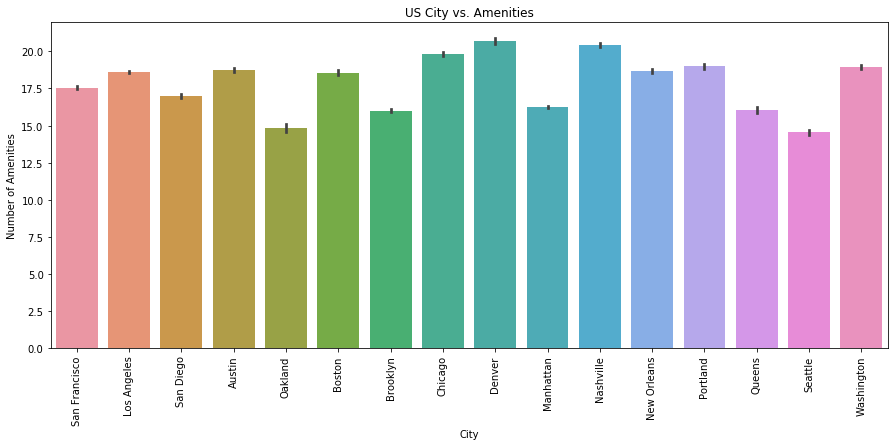

In [16]:
fig, ax = plt.subplots(figsize=(15,6)) 
ax = sns.barplot(data=df_30,
                    x="City",
                    y="Amenity_Count");
plt.xticks(rotation=90);
ax.set_title("US City vs. Amenities");
ax.set(xlabel="City", ylabel="Number of Amenities");

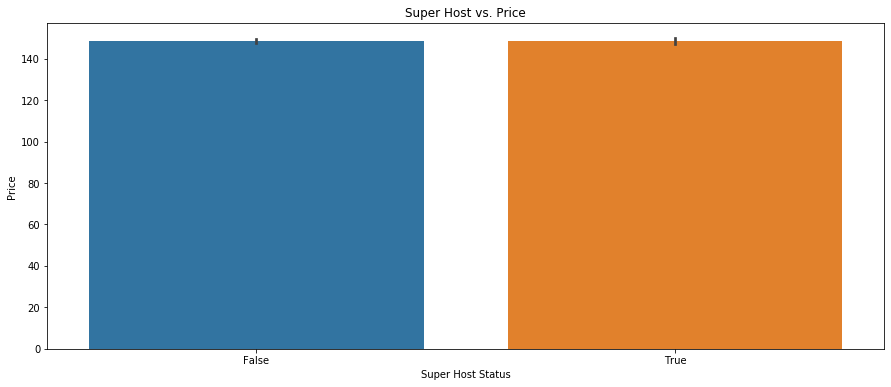

In [17]:
fig, ax = plt.subplots(figsize=(15,6)) 
ax = sns.barplot(data=df,
                    x="Host Is Superhost",
                    y="Price");
ax.set_title("Super Host vs. Price");
ax.set(xlabel="Super Host Status", ylabel="Price");